In [22]:
import json
import pandas as pd
import pprint
import numpy as np
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt

In [2]:
ds = pd.read_csv("dataset/newsqa-data-tokenized-v1.csv")

In [19]:
with open("dataset/NewsQA_train.json") as fp:
    trainData = json.load(fp)

In [57]:
with open("dataset/NewsQA_dev.json") as fp:
    devData = json.load(fp)

In [83]:
def explore_dataset(data, write_text=False, ca=False, cp=False, cq=False):
    newsqa_texts = []
    questions = []
    answers = []
    if write_text:
        fp = open("Squad_text", 'w')
    i = 0
    total = 0
    for article in data['data']:
        i += 1
        title = article['title']
        pgs = len(article['paragraphs'])
        if ca:
            print("Article \"{}\" has {} paragraphs".format(title, pgs))
            #pprint.pprint(article)
        for para in article['paragraphs']:
            if cp:
                pprint.pprint(para)
            text = para['context']
            newsqa_texts.append(text)
            if write_text:
                fp.write(text)
                fp.write("\n")
            if cq:
                pprint.pprint(text)
            total += len(para['qas'])
            qas = para['qas']
            for entry in qas:
                question = entry['question']
                questions.append(question)
                detail = entry['answers']
                for e in detail:
                    answer = e['text']
                    answers.append(answer)
                if cq:
                    print("Question: {}, Answer: {}".format(question, answer))
            cq=False

    print("{} articles, {} questions".format(i, total))
    if write_text:
        fp.close()
    return newsqa_texts, questions, answers

In [84]:
train_texts, train_questions, train_answers = explore_dataset(trainData, write_text=False, ca=False, cp=False, cq=True)

('NEW DELHI, India (CNN) -- A high court in northern India on Friday acquitted '
 'a wealthy businessman facing the death sentence for the killing of a teen in '
 'a case dubbed "the house of horrors."\n'
 '\n'
 '\n'
 '\n'
 'Moninder Singh Pandher was sentenced to death by a lower court in February.\n'
 '\n'
 '\n'
 '\n'
 'The teen was one of 19 victims -- children and young women -- in one of the '
 'most gruesome serial killings in India in recent years.\n'
 '\n'
 '\n'
 '\n'
 'The Allahabad high court has acquitted Moninder Singh Pandher, his lawyer '
 'Sikandar B. Kochar told CNN.\n'
 '\n'
 '\n'
 '\n'
 'Pandher and his domestic employee Surinder Koli were sentenced to death in '
 'February by a lower court for the rape and murder of the 14-year-old.\n'
 '\n'
 '\n'
 '\n'
 "The high court upheld Koli's death sentence, Kochar said.\n"
 '\n'
 '\n'
 '\n'
 'The two were arrested two years ago after body parts packed in plastic bags '
 'were found near their home in Noida, a New Delhi subur

In [85]:
train_alens = [len(x.split(' ')) for x in train_answers]

In [86]:
np.max(train_alens)

87

In [75]:
train_qlens = [len(x.split(' ')) for x in train_questions]

In [76]:
np.min(train_qlens)

2

In [77]:
np.max(train_qlens)

127

In [78]:
np.median(train_qlens)

6.0

In [61]:
train_lengths = [len(x.split(' ')) for x in train_texts]

In [62]:
np.min(train_lengths)

11

In [63]:
np.max(train_lengths)

718

In [64]:
np.median(train_lengths)

549.0

In [87]:
dev_texts, dev_answers, dev_qs = explore_dataset(devData, write_text=False, ca=False, cp=False, cq=True)

('(CNN) -- What could be more powerful than the tears of a Native American '
 'Indian?\n'
 '\n'
 '\n'
 '\n'
 'Wax on, wax off: Does it make you want to save the rainforests?\n'
 '\n'
 '\n'
 '\n'
 'Iron Eyes Cody was the face of the Keep American Beautiful campaign of 1971 '
 'whose tears marked the plight of the environment, but more importantly kept '
 'the problems of pollution in the minds of millions.\n'
 '\n'
 '\n'
 '\n'
 'From teary Native Americans to witty skits or doom-ladened eco-horror '
 'scenarios, the environmental campaign video then has long been a powerful '
 'tool for environmental groups to spread their message and raise pubic '
 'attention.\n'
 '\n'
 '\n'
 '\n'
 'The rise of YouTube and other video sharing web sites has now meant that '
 'individuals can broadcast their own eco-awareness messages and form their '
 'own social action networks.\n'
 '\n'
 '\n'
 '\n'
 'But what makes a good video and how much impact do they have? Is it better '
 'to be funny or shocking

In [88]:
dev_alens = [len(x.split(' ')) for x in dev_answers]

In [89]:
np.min(dev_alens)

2

In [90]:
np.max(dev_alens)

23

In [91]:
np.median(dev_alens)

6.0

In [92]:
dev_qlens = [len(x.split(' ')) for x in dev_qs]

In [93]:
np.max(dev_qlens)

43

In [68]:
dev_lengths = [len(x.split(' ')) for x in dev_texts]

In [69]:
np.min(dev_lengths)

104

In [70]:
np.max(dev_lengths)

696

In [71]:
np.median(dev_lengths)

549.0

In [3]:
len(ds)

119633

In [4]:
ds = ds.drop(columns=['answer_char_ranges','sentence_starts','is_answer_absent','is_question_bad'])

In [5]:
ds.head()

,story_id,question,story_text,answer_token_ranges
0,./cnn/stories/42d01e187213e86f5fe617fe32e716ff...,What was the amount of children murdered ?,"NEW DELHI , India -LRB- CNN -RRB- -- A high co...",60:61
1,./cnn/stories/c48228a52f26aca65c31fad273e66164...,Where was one employee killed ?,-LRB- CNN -RRB- -- Fighting in the volatile Su...,8:12
2,./cnn/stories/c65ed85800e4535f4bbbfa2c34d7d963...,who did say South Africa did not issue a visa ...,Johannesburg -LRB- CNN -RRB- -- Miffed by a vi...,23:26
3,./cnn/stories/0cf66b646e9b32076513c050edf32a79...,How many years old was the businessman ?,-LRB- CNN -RRB- -- England international footb...,97:98
4,./cnn/stories/13012604e3203c18df09289dfedd14cd...,What frightened the families ?,"BAGHDAD , Iraq -LRB- CNN -RRB- -- At least 6,0...",125:143


## Multiple Answers ##

Some entries have multiple entries in the **answer_token_ranges** column. Also, some **answer_token_ranges** don't specify a legal span (start == end). We drop these questions.

In [6]:
verbose = False
total_stories = len(ds)
num_removed = 0
text_tokens = 445
rows2drop = []

for i in tqdm_notebook(range(total_stories)):
    
    entry = ds.iloc[i]

    story_text = entry.story_text
    
    # Use basic space tokenization to pick out words for text & question
    story_tokens = [t for t in story_text.split(" ")]
    question = entry.question
    
    # Some questions are not strings!!
    if type(question) != str:
        num_removed += 1
        rows2drop.append(i)
        continue
        
    question_tokens = [t for t in question.split(" ")]
    
    # Skip if there are more than 64 tokens in the question
    if len(question_tokens) > 64:
        num_removed += 1
        rows2drop.append(i)
        continue
    
    ars = entry.answer_token_ranges
    
    # There seem to be multiple answers here
    if ',' in ars:
        num_removed += 1
        rows2drop.append(i)
        continue
    
    # Identify start & end of answer (span)
    at = [int(t) for t in ars.split(":")]
    start = at[0]
    end = at[1]
    
    # There is no answer
    if start == end:
        num_removed += 1
        rows2drop.append(i)
        continue

    # Construct the original answer
    answer = ' '.join(story_tokens[start:end])
    ds.at[i, 'original_answer'] = answer
    
    # If the original story is greater than 445 (512 - 64 - 3 [CLS], [SEP], [CLS])
    # adjust it so that it fits
    if len(story_tokens) < text_tokens:
        ds.at[i, 'story_text'] = ' '.join(story_tokens)
    elif len(story_tokens) > 445 and end < 445:
        story_tokens = story_tokens[:445]
        new_story = ' '.join(story_tokens)
        ds.at[i, 'story_text'] = new_story
    else:
        # Adjust the entries with long text and long answers
        o_s = start
        o_e = end
        o_l = len(story_tokens)
        while end > 445:
            start -= 32
            end -= 32
            story_tokens = story_tokens[32:]
        if len(story_tokens) > 445:
            story_tokens = story_tokens[:445]
            new_story = ' '.join(story_tokens)
            ds.at[i, 'story_text'] = new_story
        ds.at[i, 'answer_token_ranges'] = str(start) + ':' + str(end)
        if verbose:
            print("From {}:{} [{}] to {}:{} [{}]".format(o_s,o_e,o_l,start,end,len(story_tokens)))
        # verify that the answer remains the same
            new_answer = ' '.join(story_tokens[start:end])
            if new_answer != answer:
                print("{} vs {}".format(answer, new_answer))
                assert(answer == new_answer)
    
    # Create the story id
    story_id = entry.story_id
    ds.at[i, 'story_id'] = entry.story_id.strip('./cnn/stories/')
    
ds = ds.drop(rows2drop, axis=0)
print("{} entries were skipped".format(num_removed))


20349 entries were skipped


In [7]:
ds.head()

,story_id,question,story_text,answer_token_ranges,original_answer
0,42d01e187213e86f5fe617fe32e716ff7fa3afc4.story,What was the amount of children murdered ?,"NEW DELHI , India -LRB- CNN -RRB- -- A high co...",60:61,19
1,48228a52f26aca65c31fad273e66164f047f292.story,Where was one employee killed ?,-LRB- CNN -RRB- -- Fighting in the volatile Su...,8:12,Sudanese region of Darfur
2,65ed85800e4535f4bbbfa2c34d7d9630358d303.story,who did say South Africa did not issue a visa ...,Johannesburg -LRB- CNN -RRB- -- Miffed by a vi...,23:26,Archbishop Desmond Tutu
3,0cf66b646e9b32076513c050edf32a799200c3c2.story,How many years old was the businessman ?,-LRB- CNN -RRB- -- England international footb...,97:98,29-year-old
4,13012604e3203c18df09289dfedd14cde67cf40b.story,What frightened the families ?,"BAGHDAD , Iraq -LRB- CNN -RRB- -- At least 6,0...",125:143,a series of killings and threats by Muslim ext...


In [8]:
len(ds)

99284

In [9]:
ds.to_json("newsqa_clean.json")

Let's look at the first one in detail.

In [25]:
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'
    
def show_ds_entry(num):
    if num > len(ds):
        print("Invalid number..")
        return
    entry = ds.iloc[num]
    print(color.BOLD + "Story:" + color.END)
    print("\t{}".format(entry.story_text))
    print(color.BOLD + "Question:" + color.END)
    print("\t{}".format(entry.question))
    story_tokens = entry.story_text.split(" ")
    answers = entry.answer_token_ranges.split(",")
    print(color.BOLD + "Answer(s):" + color.END)
    for i, answer in enumerate(answers):
        at = [int(t) for t in answer.split(":")]
        print("[{}] {} @ {}".format(i, ' '.join(story_tokens[at[0]:at[1]]), at[0]))

In [26]:
show_ds_entry(23)

Story:
	-LRB- CNN -RRB- -- When Kellogg 's dumped its endorsement of Michael Phelps after a photograph surfaced of the Olympic gold medalist using a bong , the company was stuck with thousands of boxes of cereal featuring the swimmer 's image . Kellogg 's ended its Michael Phelps endorsement , so it sent two tons of cereal with his face on it to a food bank . No problem . The company , based in Battle Creek , Michigan , made short order of the already-printed and filled boxes , donating two tons of cereal to the San Francisco Food Bank late last month . With food banks across the country reporting shortages of food , the donation was a welcome one , said the food bank 's director of development , Christopher Wiley . It took only two weeks for about 3,000 boxes to move through warehouse . '' Thousands of families benefited from the donation '' Wiley said . `` It was a surprise to us . We were lacking a lot of cereal . It is a great product many low-income families really need . '' `` Th

In [27]:
show_ds_entry(62)

Story:
	-LRB- CNN -RRB- -- A 14-year-old Filipino-American boy abducted in July by suspected Islamic militants in the Philippines is free , officials said . Kevin Lunsmann was reunited with his mother , the U.S. Embassy in Manila said Monday , without offering additional details . '' It was a tough time . It was a tough five months , '' Kevin 's father , Heiko , told CNN affiliate WSET , from the family home in Lynchburg , Virginia . '' I 'm just so happy . '' Heiko Lunsmann said the boy had plotted his escape for a while and eventually seized the opportunity some time late last week while his guards slept . He `` was spotted alone '' Saturday about six miles southwest of Lamitan City on the island of Basilan , a stronghold of the Islamic militant group Abu Sayyaf , the official Philippines News Agency said . Army officials turned him over to American forces in the southern Mindanao region , the Philippine government said in a statement to CNN affiliate TV 5 . The Philippine Inquirer q

In [28]:
show_ds_entry(73)

Story:
	New York -LRB- CNN -RRB- -- When Alec Baldwin closed out the Academy Awards on Sunday night by slapping director Kathryn Bigelow squarely on the backside , that pretty much said it all . It was Ladies ' Night in a Boys ' Town . Yes , the opening routine by Baldwin and Steve Martin was very funny ; there was sincerity and genuine gratitude from many of the winners ; despite weird digressions into arcane areas like sound recording , the program moved briskly enough . But did the orchestra need to follow Bigelow 's win of her long-deserved best director prize , for `` The Hurt Locker , '' by playing the old Helen Reddy song `` I Am Woman '' ? When Zoe Saldana and Carey Mulligan arrived on stage to present the Best Original Song award , did they have to be intro-ed with `` Thank Heaven For Little Girls '' ? And in addition to being groped by Baldwin , did Bigelow have to be so muscled-in-on by her fellow producers when she was picking up the best picture award for her film , `` The

## Length of Text ##

BERT requires that the input vector be of maximum size 512. Both the question and text need to fit within this value. If we allow the questions to be of size 64, then that leaves roughly 448 tokens for the text. Let's take a look at the average lengths.

In [10]:
stories = ds['story_text']
story_lengths = []
for story in stories:
    story_lengths.append(len(story.split(" ")))

In [11]:
np.mean(story_lengths)

411.9448450908505

In [12]:
np.min(story_lengths)

20

In [13]:
np.max(story_lengths)

1937

In [14]:
np.median(story_lengths)

445.0

(array([ 4953., 26273., 26524., 22611., 17516., 11377.,  6102.,  2607.,
         1040.,   630.]),
 array([  20.,  227.,  434.,  641.,  848., 1055., 1262., 1469., 1676.,
        1883., 2090.]),
 <a list of 10 Patch objects>)

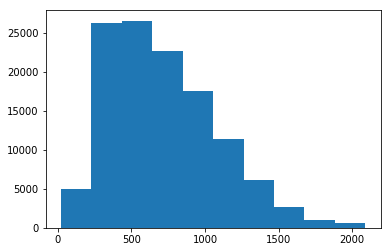

In [11]:
plt.hist(story_lengths)

In [20]:
np.sum(np.array(story_lengths) > 448)

86247

In [21]:
long_stories = stories[np.array(story_lengths) > 448]

In [22]:
long_stories[:10]

2     Johannesburg -LRB- CNN -RRB- -- Miffed by a vi...
3     -LRB- CNN -RRB- -- England international footb...
5     -LRB- CNN -RRB- -- Pope John Paul II used to b...
6     CNN affiliates report on where job seekers are...
8     TEHRAN , Iran -LRB- CNN -RRB- -- Iran 's parli...
9     -LRB- CNN -RRB- -- Jewish organizations called...
10    -LRB- CNN -RRB- -- A phone hacking scandal may...
11    ATLANTA , Georgia -LRB- CNN -RRB- -- Jeremy Pi...
12    Berlin , Germany -LRB- CNN -RRB- -- A bomb sca...
13    SAVANNAH , Georgia -LRB- CNN -RRB- -- What doe...
Name: story_text, dtype: object

In [10]:
questions = ds['question']
question_lengths = []
long_questions = []
for question in questions:
    try:
        qt = question.split(" ")
        question_lengths.append(len(qt))
        if len(qt) > 64:
            long_questions.append((question,len(qt)))
    except AttributeError:
        continue

In [11]:
long_questions[:10]

[('trashIn Jamaica , thrill seekers tear through tropical forest in a bobsled on railsIn Jamaica , thrilIn Jamaica , thrill seekers tear through tropical forest in a bobsled on railsIn Jamaica , thrill seekers tear through tropical forest in a bobsled on railsIn Jamaica , thrill seekers tear through tropical forest in a bobsled on railssdal seekers tear through tropical forest in a bobsled on rails',
  66),
 ("trash People and their pets can be laid to rest together at cemetery in England Owner : More than 30 people already buried with pets ; 100 more plots reserved Future customer : `` I 'm so sick of people saying that ` it was just a dog or a cat ' '' Anthropologist : Very old practice fell out when Christianity became institutionalized Q1 :",
  66),
 ("trasharked diplomatic protests `` Entropa '' is due to be officially unveiled at EU HQ in Brussels Thursday Bulgarian EU representative : A humiliation for the Bulgarian nation Q1 : celed Friday `` I am profoundly sorry , '' chief ex

In [12]:
len(long_questions)

13

(array([1.1765e+05, 1.5640e+03, 2.5300e+02, 1.3300e+02, 2.4000e+01,
        5.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  1. ,  15.3,  29.6,  43.9,  58.2,  72.5,  86.8, 101.1, 115.4,
        129.7, 144. ]),
 <a list of 10 Patch objects>)

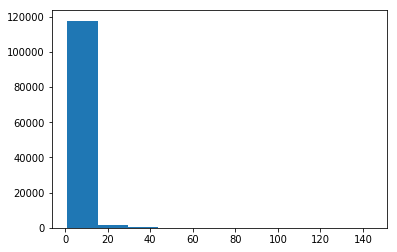

In [6]:
plt.hist(question_lengths)